# **DL Assignment No. 4**

Name : Khedkar Prajwal Ramdas       

Class : BE Computer A

Batch : D

Roll No. : 21CO063

4.Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

1.Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2.Data Collection and Preprocessing

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [5]:
# Keras only takes numpy array
training_set = dataset_train.iloc[:, 1:2].values
training_set.shape

(1258, 1)

In [7]:
sc = MinMaxScaler(feature_range=(0, 1))
# Fit: Get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

In [10]:
y_train.shape

(1198,)

In [11]:
# Reshape X_train to be suitable for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(1198, 60, 1)

3.Exploratory analysis

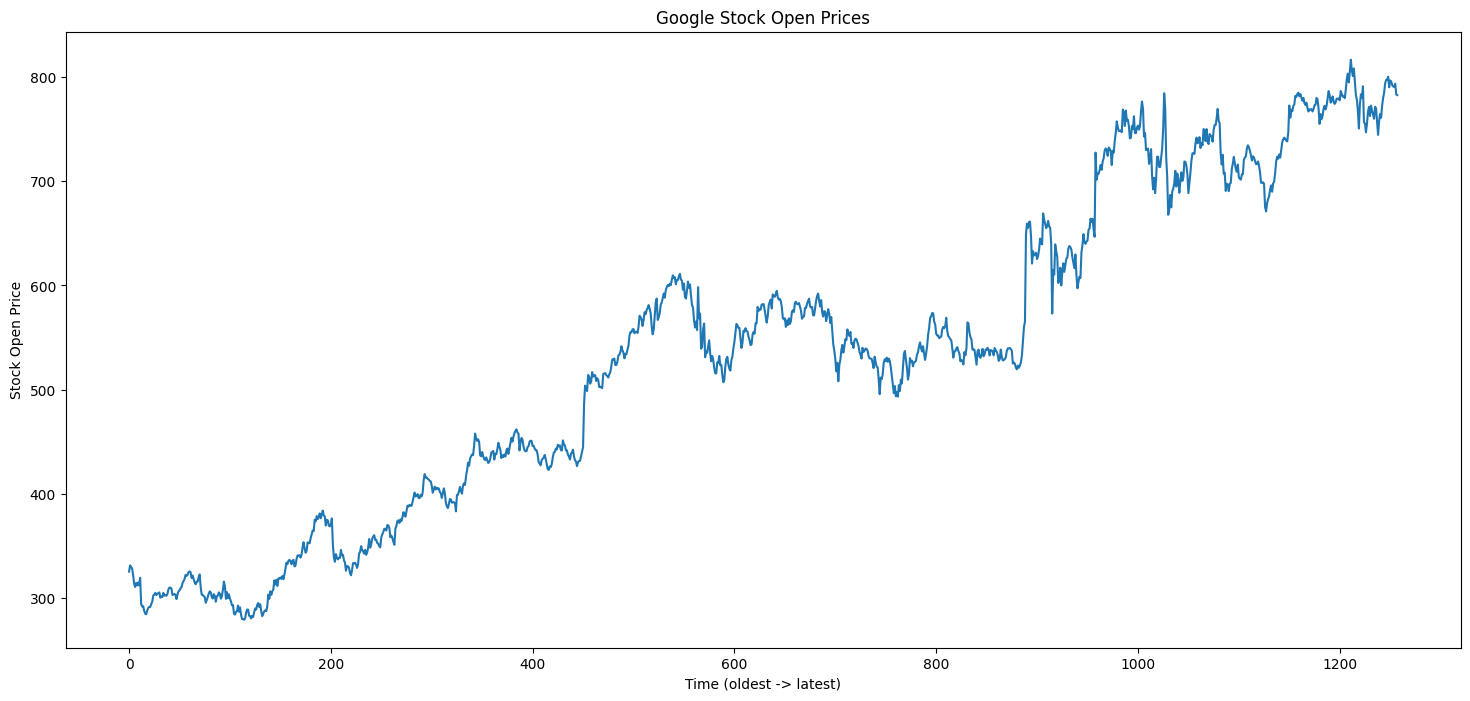

In [12]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


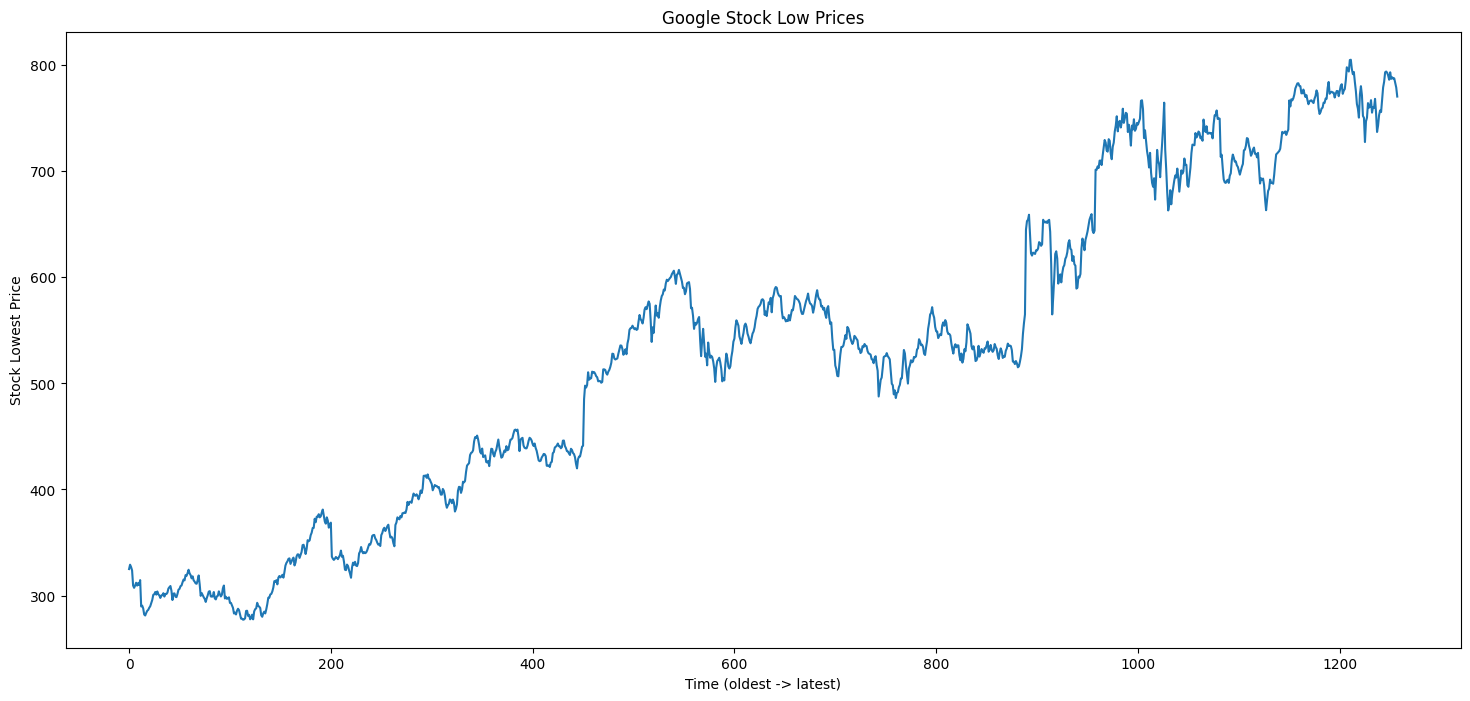

In [13]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()


4.Model Creation and Fitting

In [14]:
regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

# Output Layer
regressor.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 0.0835
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0065
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0052
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0059
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0053
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0047
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0043
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0046
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0043
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0047
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0049
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0049
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s

5.Model Evaluation

In [39]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()


Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400

In [29]:
# Keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape


(20, 1)

In [30]:
# Combine train and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [31]:
# Reshape inputs to have 1 column
inputs = inputs.reshape(-1, 1)

# Scale input
inputs = sc.transform(inputs)


In [32]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Reshape X_test to match LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 60, 1)

6.Model Prediction

In [36]:
predicted_stock_price = regressor.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [37]:
# Inverse the scaling to get real price values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


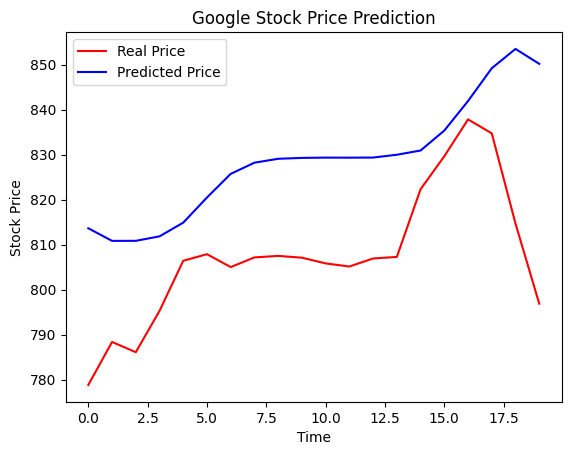

In [38]:
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
